In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

importer de la bd

In [9]:
data = pd.read_csv('USA_Housing.csv')

In [13]:
df = data.copy()
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [14]:
df.corr()

ValueError: could not convert string to float: '208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [5]:
# Créez une grille de subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

# Parcourir chaque paire de variables
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        # Créez un graphique de dispersion pour la paire de variables
        axes[i, j].scatter(df[df.columns[i]], df[df.columns[j]])
        # Ajoutez une légende au graphique
        axes[i, j].legend([df.columns[i], df.columns[j]])

# Afficher le graphique
plt.show()

KeyboardInterrupt: 

Division des données

In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = df['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [29]:
from sklearn.linear_model import LinearRegression

modelisation

In [30]:
model = LinearRegression()

In [31]:
# Entrainement du modèle

model.fit(x_train, y_train)

LinearRegression()

Evaluation

In [34]:
print(model.intercept_)
print(model.coef_)

-2633630.424045396
[2.16018598e+01 1.65667874e+05 1.20204937e+05 5.52723812e+02
 1.52584743e+01]


In [35]:
coef_df = pd.DataFrame(model.coef_, x.columns, columns=['Coeficient'])
coef_df

,Coeficient
Avg. Area Income,21.601860
Avg. Area House Age,165667.874362
Avg. Area Number of Rooms,120204.937000
Avg. Area Number of Bedrooms,552.723812
Area Population,15.258474


Prediction du modèle

In [36]:
y_predict = model.predict(x_test)

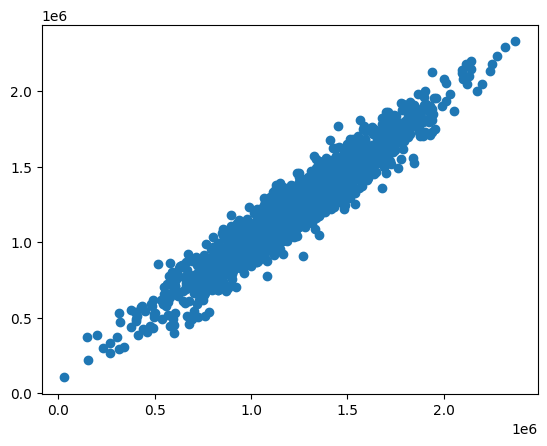

In [37]:
plt.scatter(y_test, y_predict)

Metric d'evaluation

In [38]:
from sklearn import metrics

In [39]:

# Affichage du coefficient de détermination R²

print('R²:', metrics.r2_score(y_test, y_predict))

R²: 0.918528414063094
